# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren unabhängig voneinander

In [1]:
import numpy as np
import torch

from script.NeuralNets.Networks import ICNN
from script.NeuralNets.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for

In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 5
batch_size = 1

number_of_adversarial_samples = 1000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


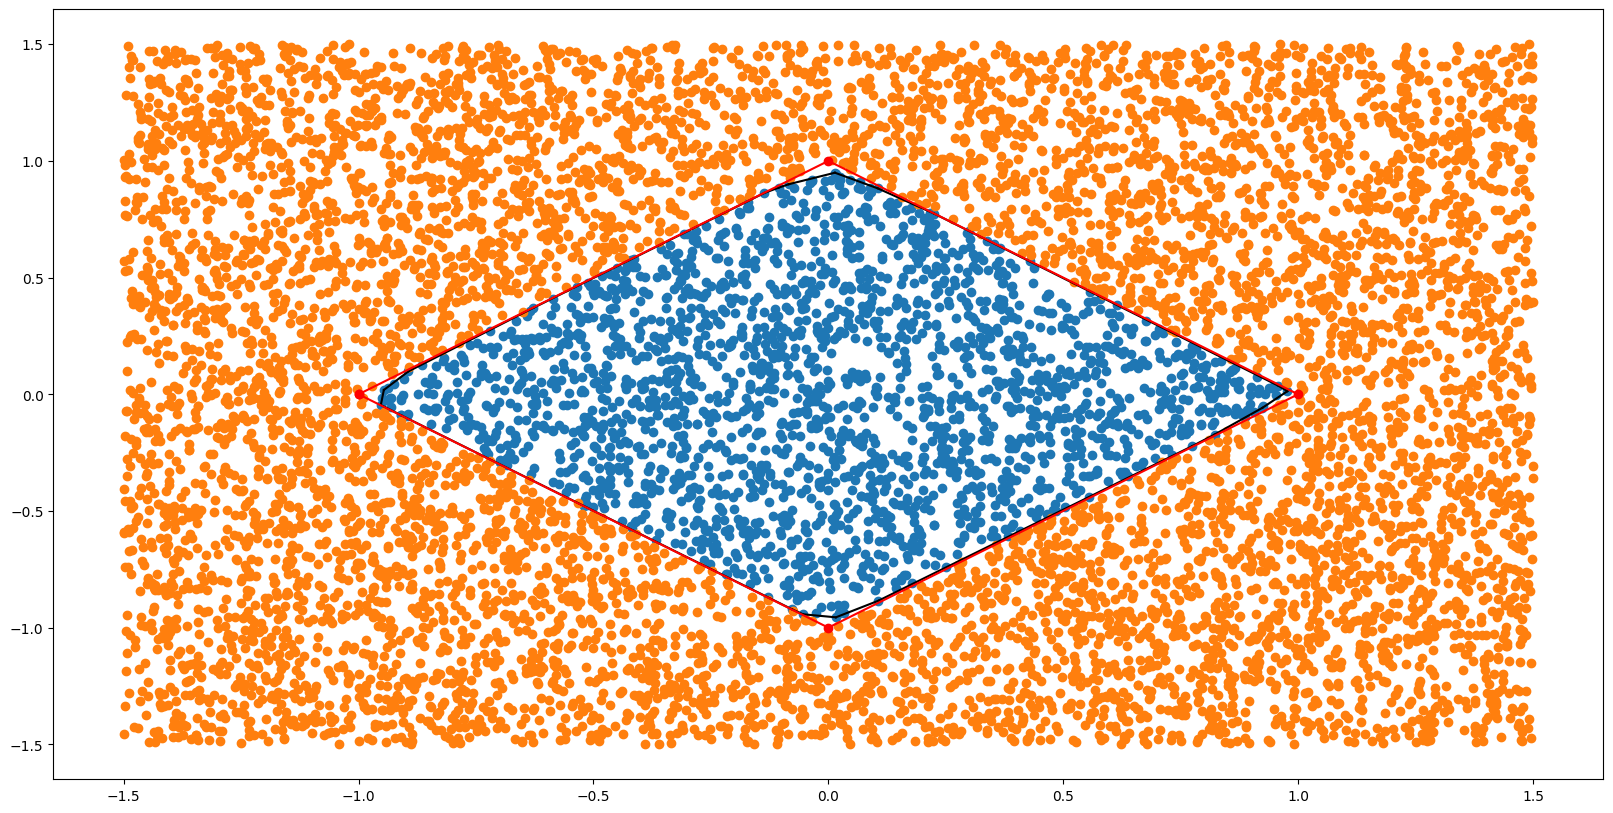

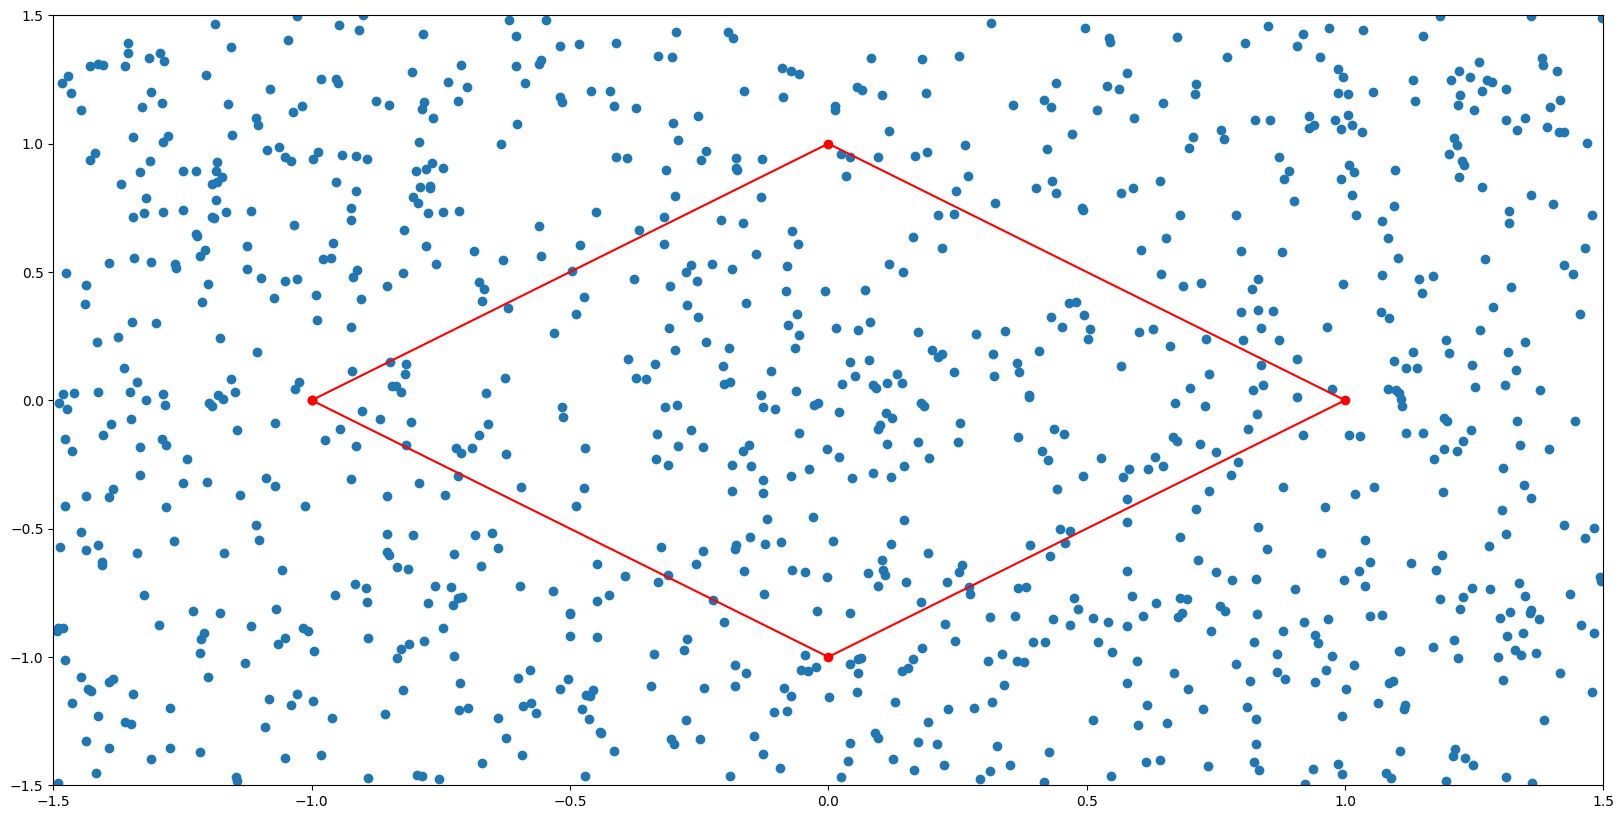

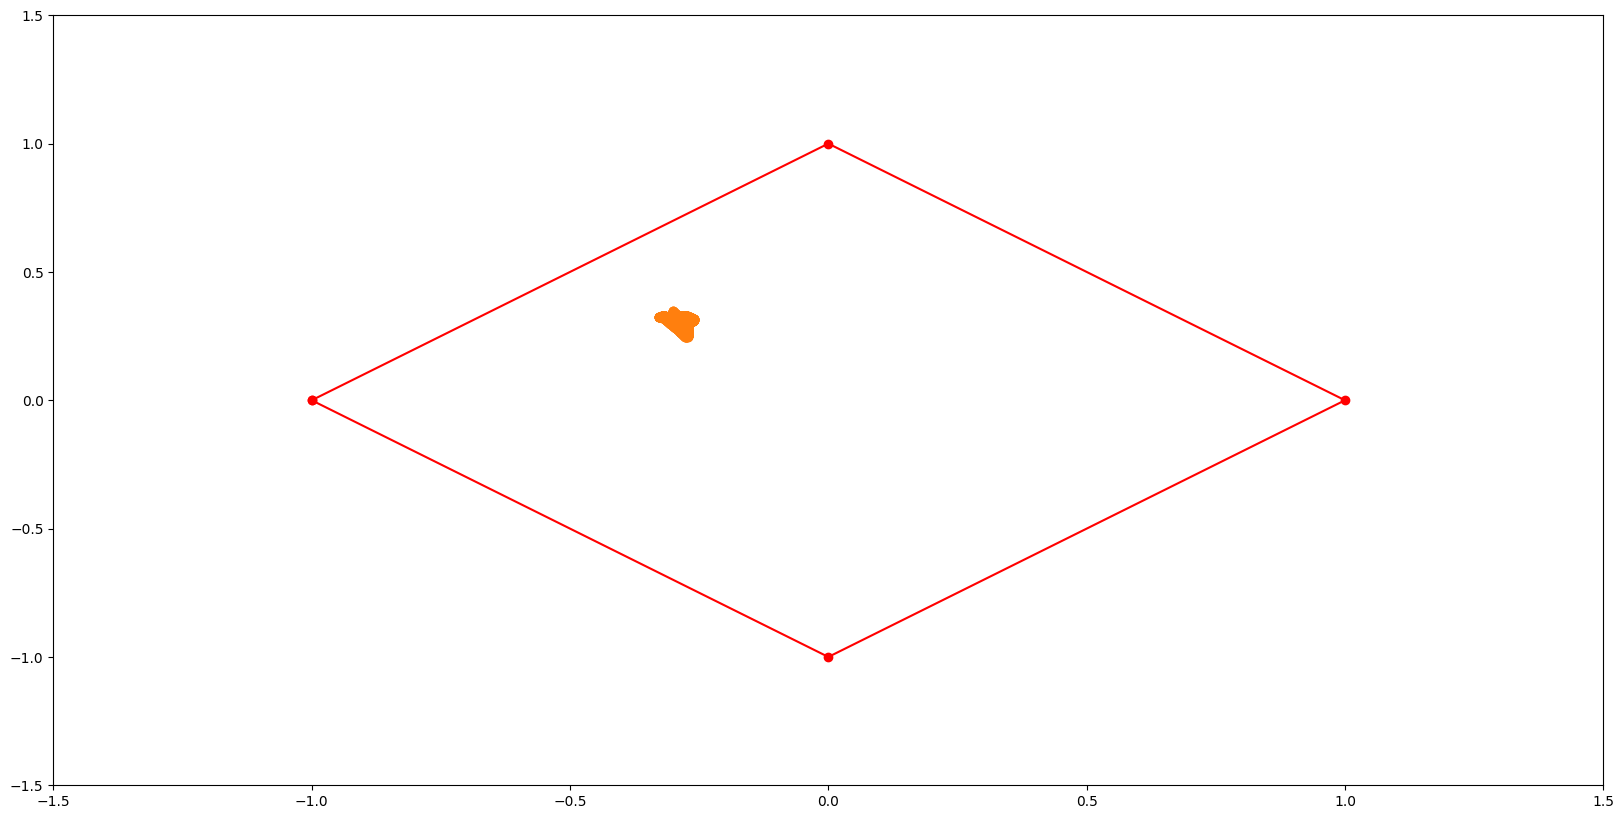

In [5]:
plots = Plots_for(0, icnn, included_space, ambient_space, x_range, y_range, extr=true_extremal_points, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


=== Epoch: 0===
batch = 0, mean loss = 1.5341249666670222
batch = 100, mean loss = 1.3384746706612198
batch = 200, mean loss = 1.3252023273447107
batch = 300, mean loss = 1.2850936166227245
batch = 400, mean loss = 1.2538823032394053
batch = 500, mean loss = 1.2161892407844659
batch = 600, mean loss = 1.1832678123836977
batch = 700, mean loss = 1.1465580050310558
batch = 800, mean loss = 1.108663802319039
batch = 900, mean loss = 1.0727925003724608
batch = 1000, mean loss = 1.0478719877819243
batch = 1100, mean loss = 1.0139402189828794
batch = 1200, mean loss = 0.9891572504188645
batch = 1300, mean loss = 0.9646732677330531
batch = 1400, mean loss = 0.9424572620085766
batch = 1500, mean loss = 0.9181229958370998
batch = 1600, mean loss = 0.8954948830960952
batch = 1700, mean loss = 0.8764728575543604
batch = 1800, mean loss = 0.856842856531568
batch = 1900, mean loss = 0.8409957447263889
batch = 2000, mean loss = 0.8261421838568462
batch = 2100, mean loss = 0.810468938418288
batch = 2

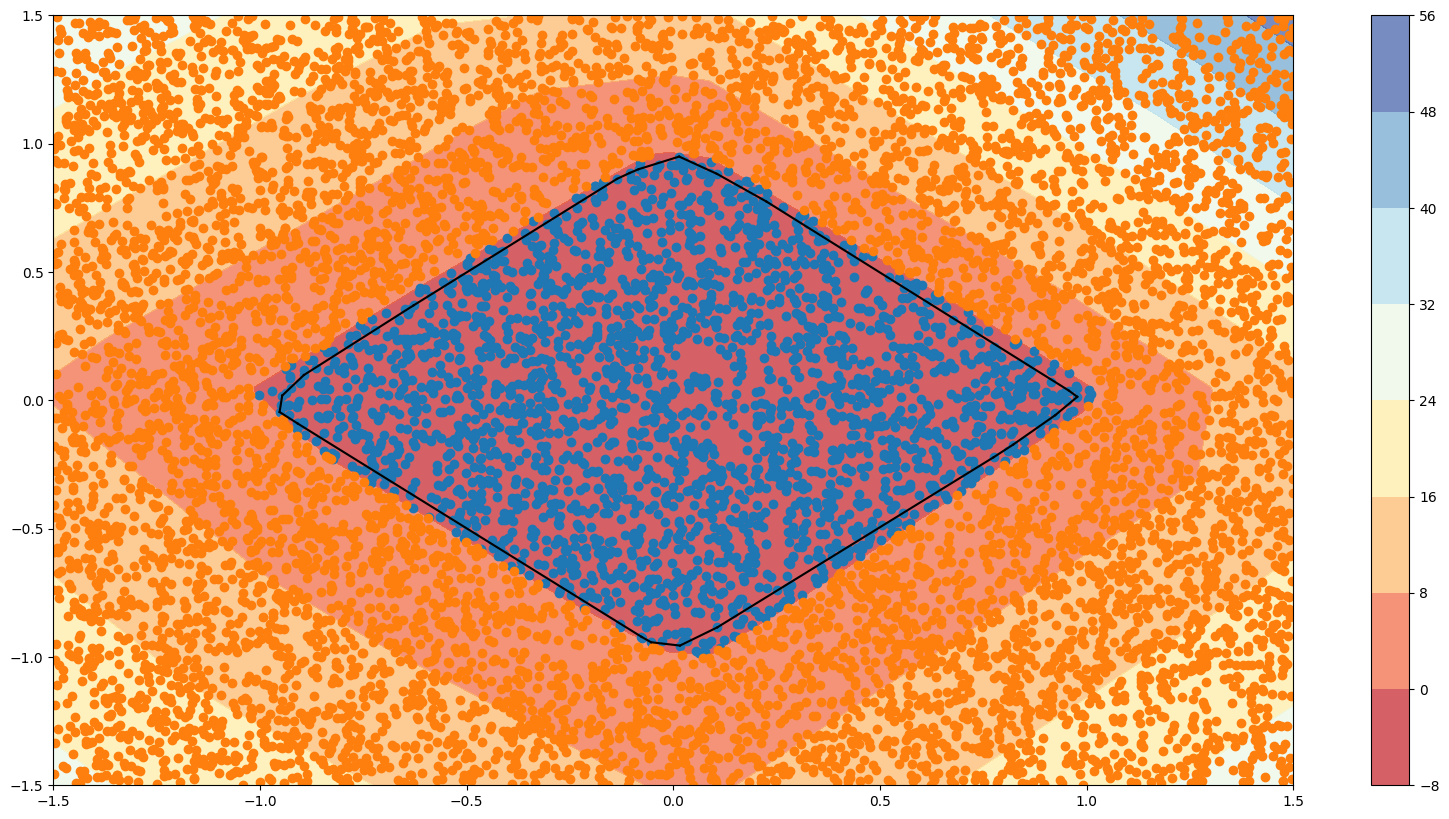

In [6]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)
plots.plt_mesh()

In [7]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, train_ICNN=False, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 3.8681585820266338, l_pos = 0.03164542101238812, l_neg = 3.814463622863735, l_gen = 0.02204953815051022
batch = 100, mean loss = 3.480765846833424, l_pos = 0.07516570762354725, l_neg = 3.347579268567126, l_gen = 0.05802087064275108
batch = 200, mean loss = 2.3270760368068166, l_pos = 0.06984015710290895, l_neg = 1.819767906796857, l_gen = 0.43746797290705225
batch = 300, mean loss = 1.9078969727514101, l_pos = 0.06621647074562817, l_neg = 1.2333470617767575, l_gen = 0.6083334402290257
batch = 400, mean loss = 1.7032788015260913, l_pos = 0.07085179045027792, l_neg = 0.9341805383128119, l_gen = 0.6982464727630043
batch = 500, mean loss = 1.575645906827675, l_pos = 0.0691297757419926, l_neg = 0.7528851988728748, l_gen = 0.7536309322128111
batch = 600, mean loss = 1.490191256229731, l_pos = 0.06759954095306521, l_neg = 0.6325557574378871, l_gen = 0.790035957838781
batch = 700, mean loss = 1.4290000503671216, l_pos = 0.06661590514645951, l_neg = 0.5439

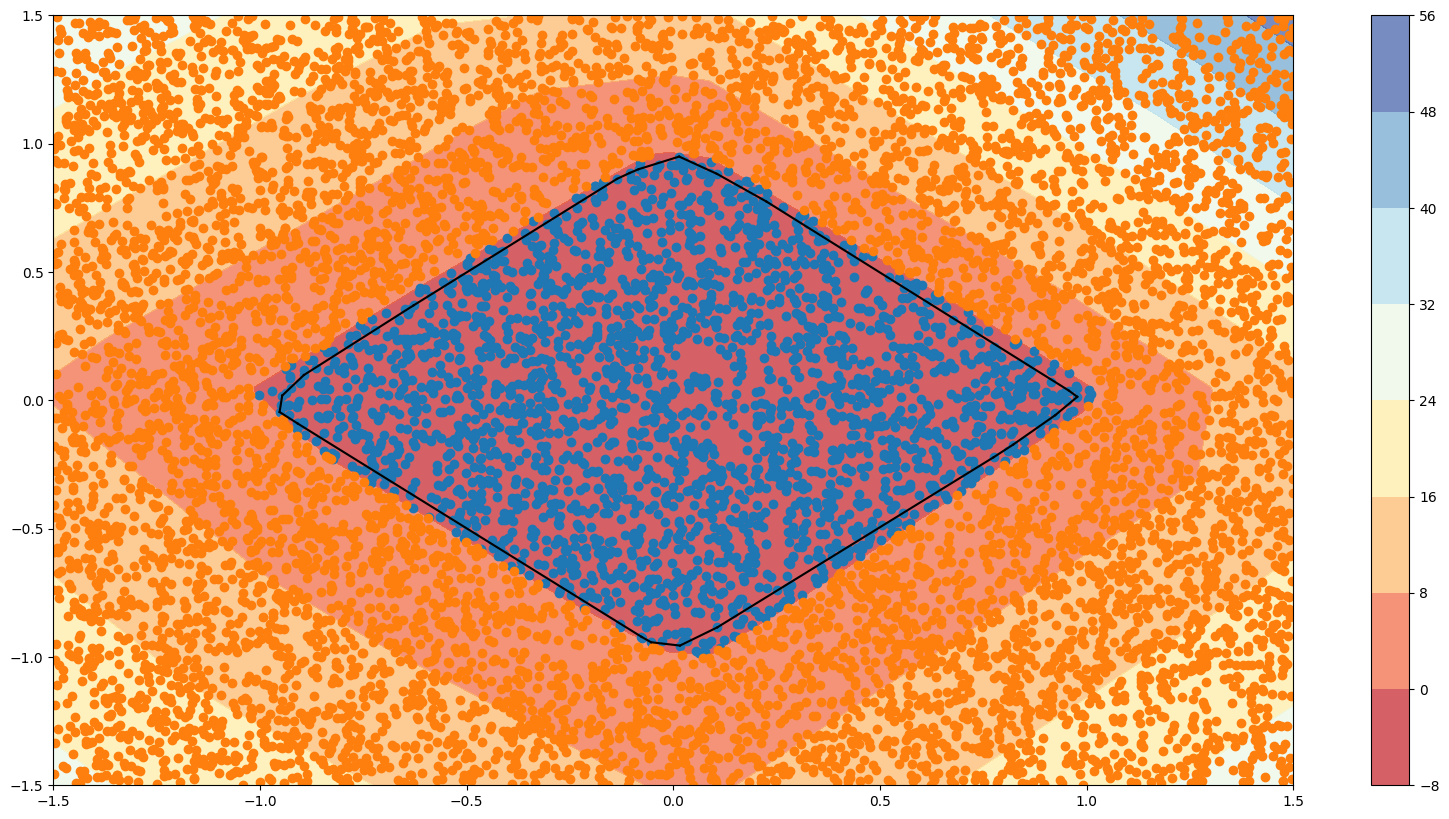

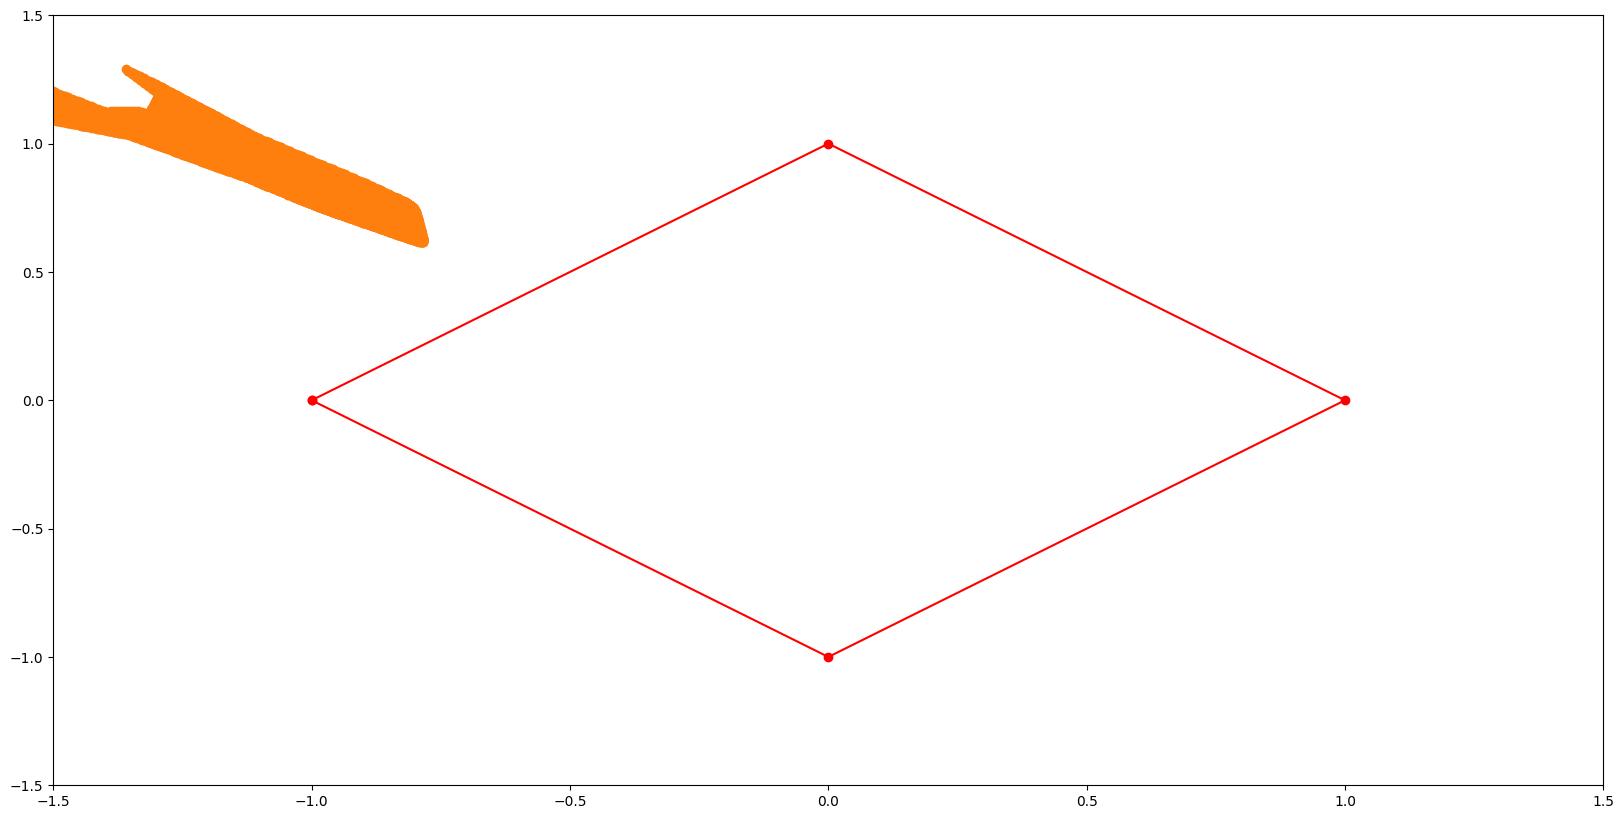

In [8]:
plots.plt_mesh()
plots.plt_adversarial_dotted()